In [10]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [9]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
customer_df.shape

(9134, 24)

In [7]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [11]:
# Rename the columns to follow the PE8 (snake case: lowercase_with_underscores)
customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')

In [12]:
# Change the type of effective_to_date column to DateTime format
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [13]:
# Check NaN values per column
print(customer_df.isnull().sum())

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64


In [14]:
# Define a function to separate numerical and categorical columns
def separate_numeric_categorical(dataframe):
    numeric_df = dataframe.select_dtypes(include=np.number)
    categorical_df = dataframe.select_dtypes(exclude=np.number)
    return numeric_df, categorical_df

In [15]:
# Drop any ID column (assuming there is an ID column named 'customer')
customer_df.drop(columns='customer', inplace=True)

In [16]:
# Get the correlation matrix for the numerical variables
numeric_df, _ = separate_numeric_categorical(customer_df)
correlation_matrix = numeric_df.corr()

In [18]:
highest_corr = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
highest_corr = highest_corr[highest_corr != 1].idxmax()

print("Pair of numerical variables with the highest correlation:", highest_corr)

Pair of numerical variables with the highest correlation: ('monthly_premium_auto', 'total_claim_amount')


In [19]:
# Define a function to separate continuous and discrete numerical columns
def separate_continuous_discrete(dataframe, unique_threshold=36):
    continuous_df = dataframe.select_dtypes(include=np.number).loc[:, dataframe.nunique() > unique_threshold]
    discrete_df = dataframe.select_dtypes(include=np.number).loc[:, dataframe.nunique() <= unique_threshold]
    return continuous_df, discrete_df

In [20]:
# Create two new dataframes: continuous_df and discrete_df
continuous_df, discrete_df = separate_continuous_discrete(customer_df)

In [21]:
# Create a function to create a barplot for all the columns of the discrete_df
def plot_barplots(dataframe):
    for column in dataframe.columns:
        plt.figure(figsize=(16, 16))
        sns.barplot(x=column, y=dataframe[column].value_counts().index, data=dataframe)
        plt.show()

In [22]:
# Create a function to create a histogram for all the columns of the continuous_df
def plot_histograms(dataframe):
    for column in dataframe.columns:
        plt.figure(figsize=(16, 16))
        sns.histplot(dataframe[column], kde=True)
        plt.show()

In [23]:
# Define a function to create a plot for identifying outliers in continuous variables
def plot_outliers(dataframe):
    for column in dataframe.columns:
        plt.figure(figsize=(16, 6))
        sns.boxplot(x=dataframe[column])
        plt.show()

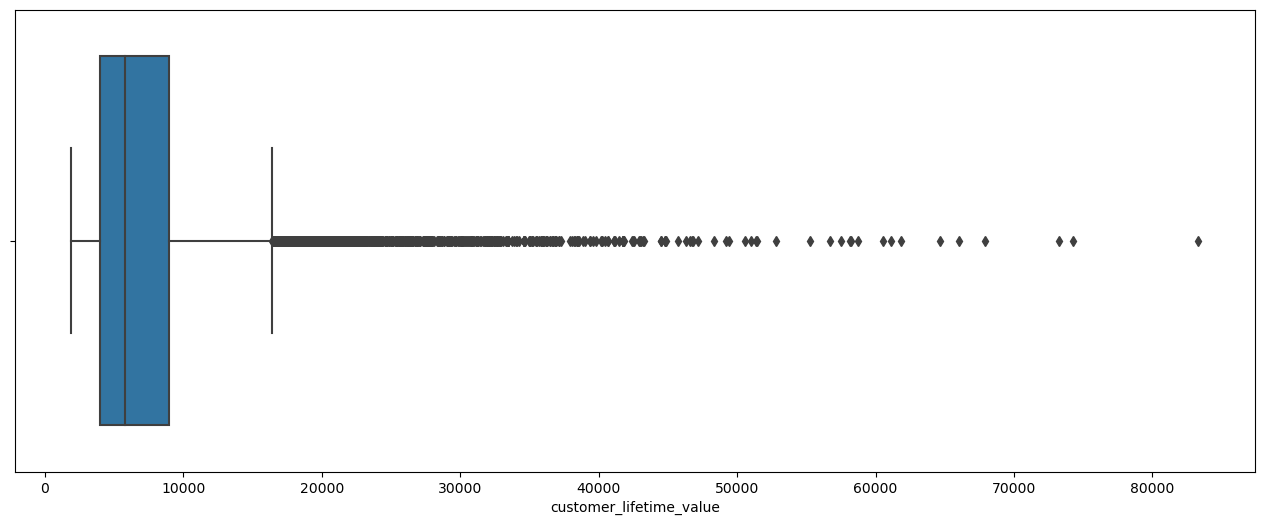

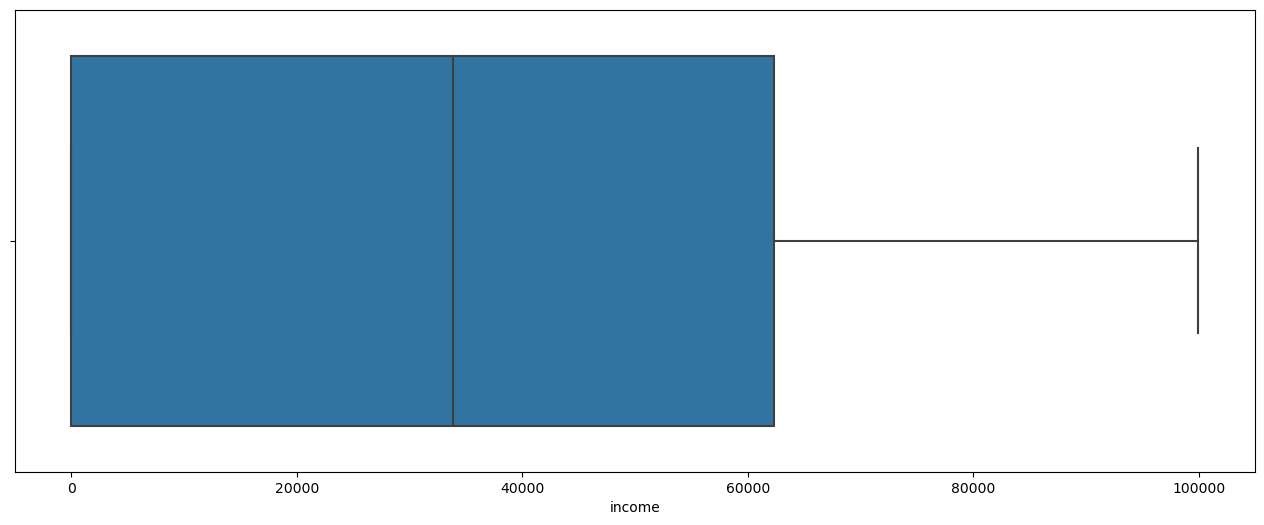

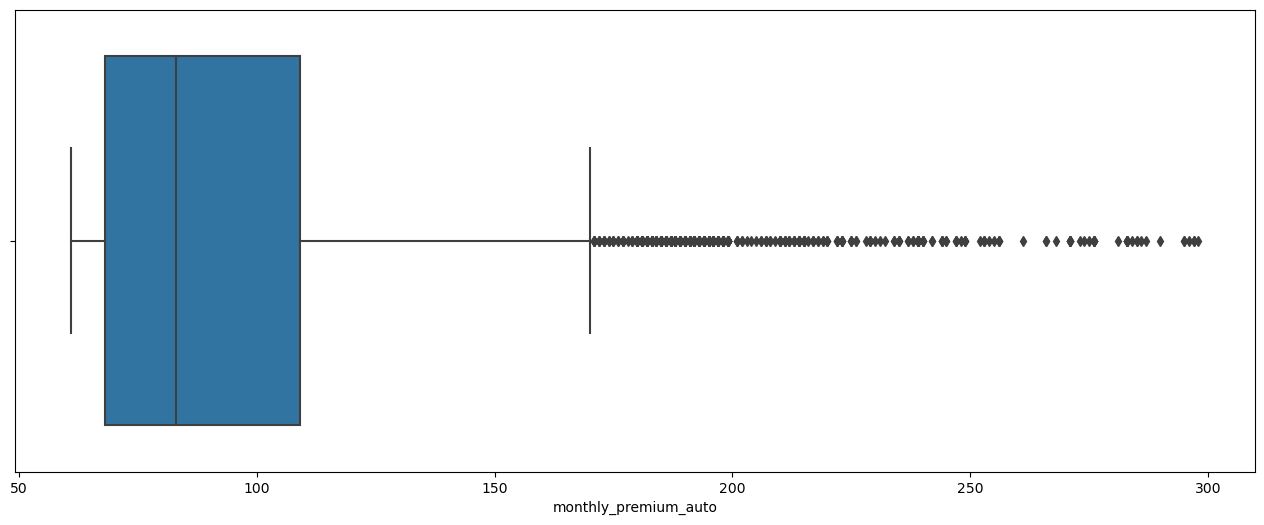

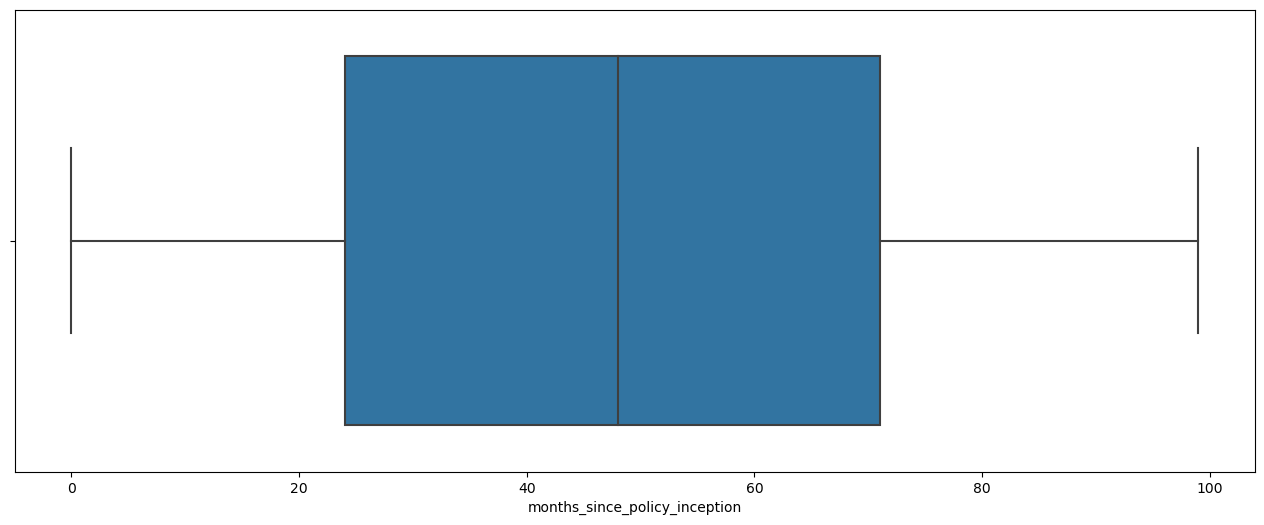

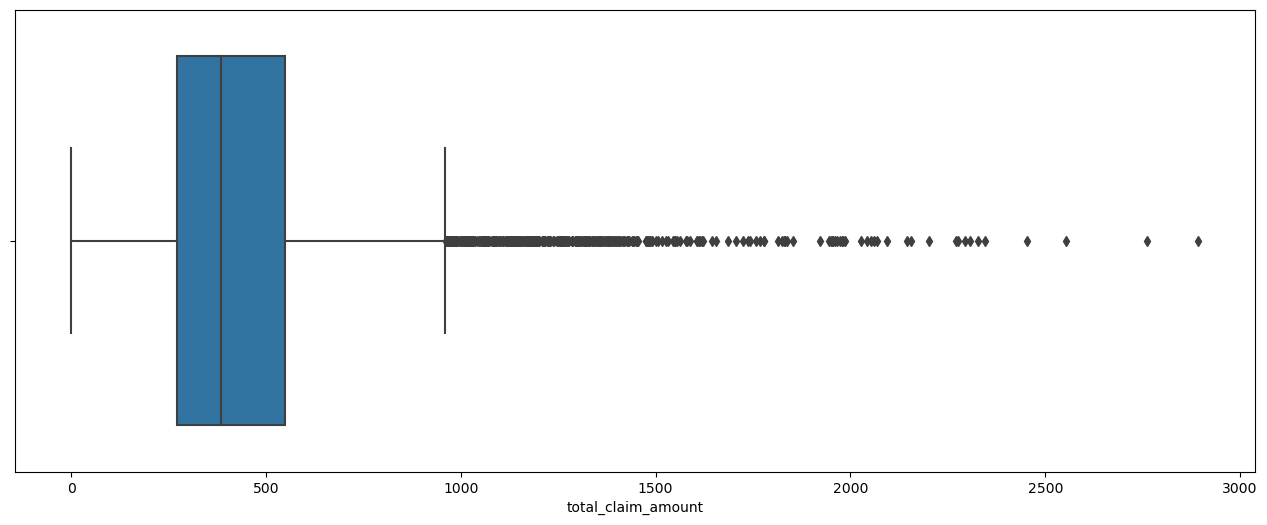

In [24]:
# Plot outliers in the continuous variables
plot_outliers(continuous_df)